# Load packages and data


In [19]:
import logging
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from DecisionTreeClassifier import (
    DecisionTreeClassifier as CustomDecisionTreeClassifier,
)
from rich import print
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as SklearnDecisionTreeClassifier
from sklearn.tree import plot_tree as plot_sklearn_tree

logging.basicConfig(level=logging.INFO)

%load_ext rich
%load_ext autoreload 

%autoreload 2


The rich extension is already loaded. To reload it, use:
  %reload_ext rich
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
data = pd.read_csv("../data/train.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.shape

(891, 12)

In [24]:
data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Embarked", "Sex"]

data = data.dropna(subset=["Age", "Embarked"])
data = data.drop("PassengerId", axis=1)

X = data.drop("Survived", axis=1)[features]
y = data["Survived"]

X = pd.get_dummies(X, columns=["Embarked", "Sex"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
472,2,33.0,1,2,27.7500,False,False,True,True,False
432,2,42.0,1,0,26.0000,False,False,True,True,False
666,2,25.0,0,0,13.0000,False,False,True,False,True
30,1,40.0,0,0,27.7208,True,False,False,False,True
291,1,19.0,1,0,91.0792,True,False,False,True,False


# Decision Tree


## Custom implementation

In [28]:
clf = CustomDecisionTreeClassifier(max_depth=5, min_samples_split=15, max_features=10, debug=True)

clf.fit(X_train.values, y_train.values)


DEBUG:DecisionTreeClassifier:Starting to fit the model.
DEBUG:DecisionTreeClassifier:Finding best split for feature 8
DEBUG:DecisionTreeClassifier:Finding best split for feature 1
DEBUG:DecisionTreeClassifier:Finding best split for feature 5
DEBUG:DecisionTreeClassifier:Finding best split for feature 0
DEBUG:DecisionTreeClassifier:Best split found at feature 8 with threshold False and gain 0.2250996058839727
DEBUG:DecisionTreeClassifier:Splitting at depth 0: Feature 8 at threshold False, Left samples: 361, Right samples: 208
DEBUG:DecisionTreeClassifier:Finding best split for feature 0
DEBUG:DecisionTreeClassifier:Finding best split for feature 1
DEBUG:DecisionTreeClassifier:Finding best split for feature 8
DEBUG:DecisionTreeClassifier:Finding best split for feature 5
DEBUG:DecisionTreeClassifier:Best split found at feature 0 with threshold 1 and gain 0.05573414794481102
DEBUG:DecisionTreeClassifier:Splitting at depth 1: Feature 0 at threshold 1, Left samples: 81, Right samples: 280
DE

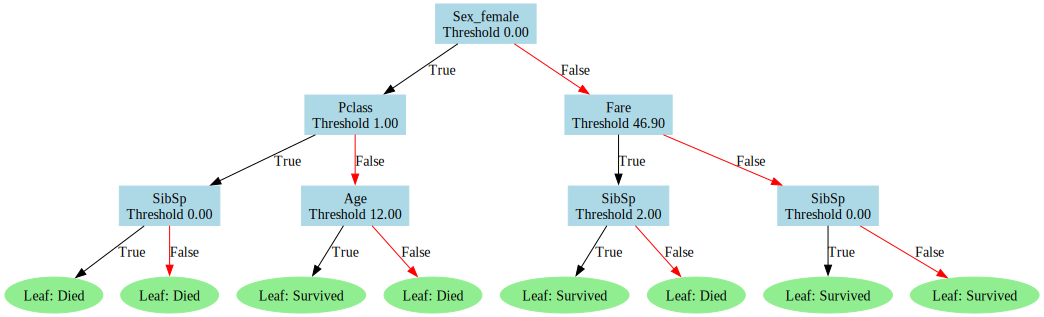

In [29]:
clf.visualize_tree(
    feature_names=X_train.columns.tolist(), class_names={0: "Died", 1: "Survived"}
)

In [30]:
preds = clf.predict(X_test.values)

DEBUG:DecisionTreeClassifier:Starting prediction.
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 8, Threshold: False
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 4, Threshold: 46.9
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 2, Threshold: 0
DEBUG:DecisionTreeClassifier:Reached leaf node. Value: 1
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 8, Threshold: False
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 4, Threshold: 46.9
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 2, Threshold: 0
DEBUG:DecisionTreeClassifier:Reached leaf node. Value: 1
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 8, Threshold: False
DEBUG:DecisionTreeClassifier:Traversing left node. Feature: 0, Threshold: 1
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 2, Threshold: 0
DEBUG:DecisionTreeClassifier:Reached leaf node. Value: 0
DEBUG:DecisionTreeClassifier:Traversing right node. Feature: 8, Thresho

Custom Decision Tree Classifier

------------------------------

Accuracy: 0.76

Precision: 0.73

Recall: 0.71

F1 Score: 0.72

precision    recall  f1-score   support

           0       0.78      0.79      0.78        80
           1       0.73      0.71      0.72        63

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.76      0.76       143

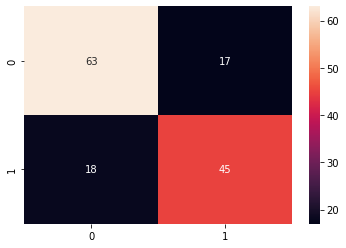

In [31]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("Custom Decision Tree Classifier")
print("---" * 10)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()


## Scikit-learn implementation

Scikit-Learn Decision Tree Classifier

------------------------------

Accuracy: 0.74

Precision: 0.88

Recall: 0.48

F1 Score: 0.62

precision    recall  f1-score   support

           0       0.70      0.95      0.80        80
           1       0.88      0.48      0.62        63

    accuracy                           0.74       143
   macro avg       0.79      0.71      0.71       143
weighted avg       0.78      0.74      0.72       143

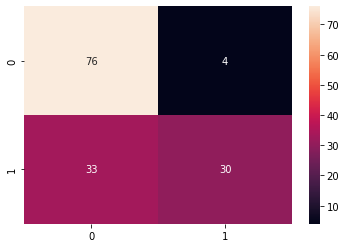

In [32]:
sklearn_clf = SklearnDecisionTreeClassifier(
    max_depth=5,
    min_samples_split=15,
    max_features=10,
    random_state=42,
    criterion="entropy",
)

sklearn_clf.fit(X_train, y_train)

sklearn_preds = sklearn_clf.predict(X_test)

accuracy = accuracy_score(y_test, sklearn_preds)
precision = precision_score(y_test, sklearn_preds)
recall = recall_score(y_test, sklearn_preds)
f1 = f1_score(y_test, sklearn_preds)

print("Scikit-Learn Decision Tree Classifier")
print("---" * 10)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print(classification_report(y_test, sklearn_preds))

cm = confusion_matrix(y_test, sklearn_preds)
sns.heatmap(cm, annot=True, fmt="d")

plt.show()


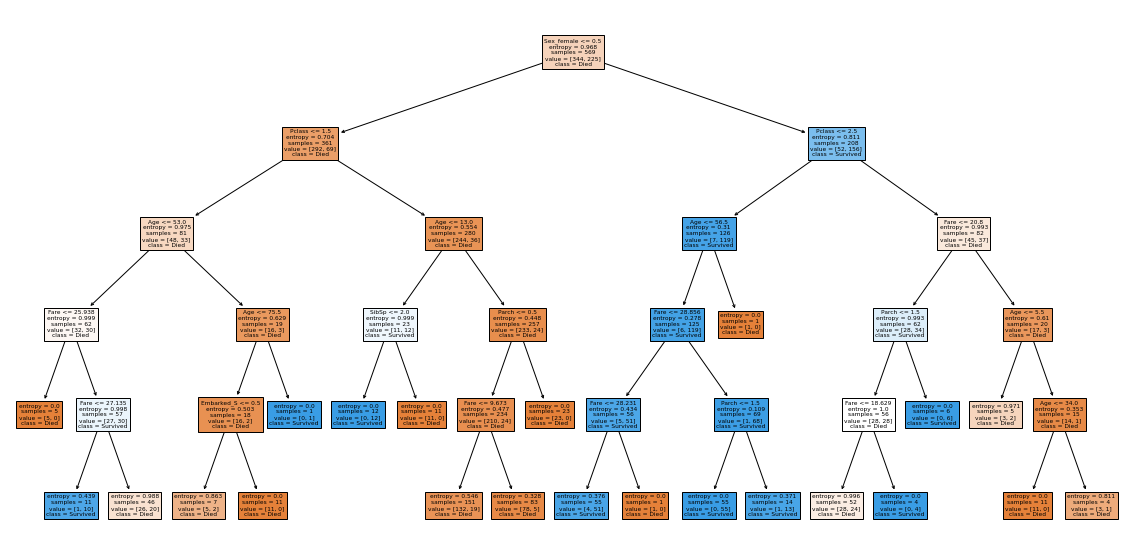

In [12]:
plt.figure(figsize=(20, 10))
sklearn_tree = plot_sklearn_tree(
    sklearn_clf,
    filled=True,
    feature_names=X_train.columns,
    class_names=["Died", "Survived"],
)

plt.show()
